In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
sachin = pd.read_excel('./data/sachin.xlsx')

In [124]:
sachin.head(3)

,Score,Against,Format,Ground,Date
0,119*,England,Test,Manchester,1990-09-08 00:00:00
1,148*,Australia,Test,Sydney,1992-02-01 00:00:00
2,114,Australia,Test,Perth,1992-01-02 00:00:00


In [125]:
df = sachin.groupby(['Against', 'Format'])['Score'].\
            apply(lambda x: len(x)).\
            reset_index().\
            rename(columns={'Score':'Centuries'})

In [126]:
df.head()

,Against,Format,Centuries
0,Australia,ODI,9
1,Australia,Test,11
2,Bangladesh,ODI,1
3,Bangladesh,Test,5
4,England,ODI,2


In [127]:
# Taking out Non test playing nations

df_new = df[~((df['Against']=='Kenya') | (df['Against']=='Namibia'))]

### Compare Centuries in ODI and Test against different countries

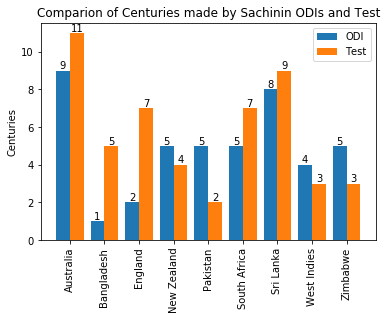

In [128]:
fig, ax = plt.subplots()

# bar width
width = 0.40

# different countries against whom Sachin scored century in ODIs and Test
countries = df_new['Against'][0::2]

# index 
indx = np.arange(len(countries))

# Plot for ODI centuries
rect1 = ax.bar(indx, 'Centuries', width, data=df_new[df_new.Format=='ODI'], label='ODI')

# Plot for Test centuries
rect2 = ax.bar(indx + width, 'Centuries', width, data=df_new[df_new.Format=='Test'], label='Test')

# display ticks
ax.set_xticks(indx+width/2)

# Set labels for ticks
ax.set_xticklabels(countries, rotation=90)


ax.set_ylabel('Centuries')

ax.set_title('Comparion of Centuries made by Sachinin ODIs and Test')

# Display legend
ax.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
plt.show()

### Pie Chart

In [129]:
tot_centuries = df.groupby('Against')['Centuries'].agg(np.sum).sort_values(ascending=False)

In [130]:
tot_centuries

Against
Australia       20
Sri Lanka       17
South Africa    12
New Zealand      9
England          9
Zimbabwe         8
West Indies      7
Pakistan         7
Bangladesh       6
Kenya            4
Namibia          1
Name: Centuries, dtype: int64

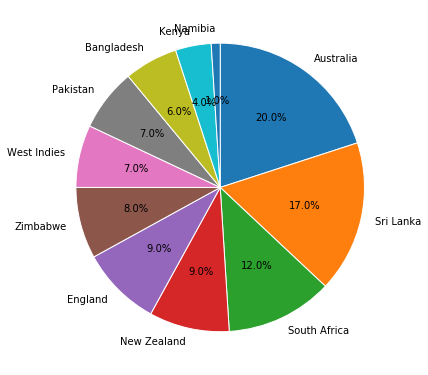

In [131]:
## pie chart
fig, ax = plt.subplots(figsize=(6,6))

pie_wedge_collection  = ax.pie(tot_centuries, labels=tot_centuries.index, 
              autopct='%1.1f%%', startangle=90, counterclock=False)

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

plt.tight_layout()
plt.show()

### How big Sachin has scored centuries

In [132]:
sachin['Score'].replace(regex=True, inplace=True, to_replace=r'[^0-9]',value=r'')

In [133]:
sachin['Score'] = sachin['Score'].astype('int')

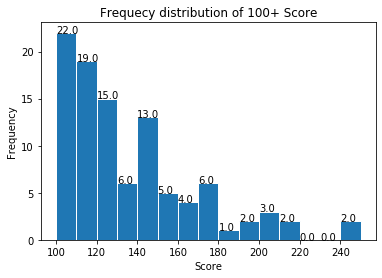

In [134]:
fig, ax = plt.subplots()

bin_list = np.arange(100,max(sachin.Score)+10, 10)

arr = ax.hist(sachin['Score'], bins=bin_list, edgecolor='white')

ax.set_ylabel('Frequency')
ax.set_xlabel('Score')

ax.set_title('Frequecy distribution of 100+ Score')


for i in range(len(bin_list)-1):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    



plt.show()

In [135]:
sachin.Date[0:10]

0    1990-09-08 00:00:00
1    1992-02-01 00:00:00
2    1992-01-02 00:00:00
3               11/26/92
4    1993-11-02 00:00:00
5               07/27/93
6               01/18/94
7    1994-09-09 00:00:00
8               10/28/94
9    1994-11-11 00:00:00
Name: Date, dtype: object

In [136]:
sachin.Date = pd.to_datetime(sachin.Date)

In [137]:
sachin['yr'] = sachin['Date'].dt.year

In [138]:
centuries_by_yr = sachin.groupby('yr')['Score'].apply(lambda x : len(x))

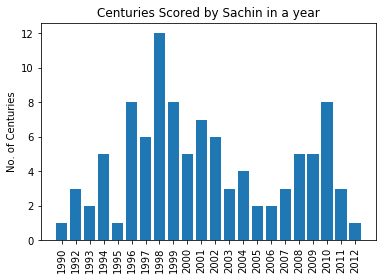

In [139]:
fig, ax = plt.subplots()

indx = np.arange(len(centuries_by_yr))
bars = ax.bar(indx, centuries_by_yr)

ax.set_xticks(indx)
ax.set_xticklabels(centuries_by_yr.index, rotation=90)

ax.set_ylabel('No. of Centuries')
ax.set_title('Centuries Scored by Sachin in a year')
plt.show()